PREDIÇÃO DE CHURN

A previsão de CHURN ou rotatividade de clientes é importante para identificar por que os clientes estão deixando uma empresa ou negócio.

Aqui é analisado o Dataset 'Telco Customer Churn' um negócio de telecomunicações.

Que poder ser acessado no link abaixo:

https://www.kaggle.com/blastchar/telco-customer-churn

Será construido um modelo de Machine Learning para medir a taxa de Churn.

IMPORTS

In [48]:
# Import Necessary Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Importando o Dataset

In [2]:
ds = pd.read_csv('Telco-Customer-Churn.csv')

Verificando o número de linhas e colunas

In [3]:
ds.shape

(7043, 21)

Verificando o Dataset

In [4]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Análise Exploratória e Tratamento de dados**

Informações sobre os dados do dataset

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Convertendo as Strings Yes e No da Coluna Churn em 1 e 0

In [6]:
churn_numeric = {'Yes':1, 'No':0}
ds.Churn.replace(churn_numeric, inplace=True)

Convertendo a informação 'No Internet Service' apenas para No

In [7]:
cols = ['OnlineBackup', 'StreamingMovies','DeviceProtection',
                'TechSupport','OnlineSecurity','StreamingTV']
for i in cols : 
    ds[i]  = ds[i].replace({'No internet service' : 'No'})

A coluna TotalCharges deveria ser numérica, então precisa ser convertida

In [8]:
pd.to_numeric(ds.TotalCharges)

ValueError: ignored

Aparentemente temos valores que não deixam converter, será necessário verificar

In [9]:
#alguns valores não são números, mas sim strings em branco.
pd.to_numeric(ds.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

Tratando os espaços nulos

In [10]:
#Temos dados em branco
ds[pd.to_numeric(ds.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [11]:
#Verificando o que tem na linha 488
ds.iloc[488].TotalCharges

' '

Temos aspas na coluna o que não deixa alterar o tipo para númerio

In [12]:
ds[ds.TotalCharges!=' '].shape

(7032, 21)

In [13]:
#removendo as linhas de TotalCharges com espaço.
ds = ds[ds.TotalCharges!=' ']
ds.shape

(7032, 21)

In [14]:
#Agora conseguimos passar a coluna par ao tipo numérico
ds["TotalCharges"] = ds["TotalCharges"].astype(float)

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Visualizando algumas Estatísticas do dataset

In [16]:
ds.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


Verificando a distribuição entre quem deixou(1) a empresa e quem não deixou(0)

In [ ]:
ds["Churn"].value_counts()

Pporcentagem de clientes que cancelaram

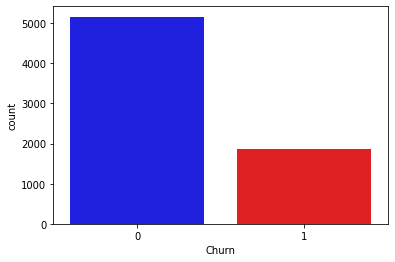

In [17]:
sns.countplot(data=ds,x='Churn',palette= ('Blue', 'Red'));

In [18]:
ds['Churn'].sum()/ds['Churn'].count()

0.26578498293515357

Churn em relação ao gender

In [19]:
ds[['gender', 'Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269595
Male,0.262046


Churn em relação ao Tech Support

In [20]:
ds[['TechSupport', 'Churn']].groupby(['TechSupport']).mean()

,Churn
TechSupport,
No,0.312300
Yes,0.151961


Churn em relação a Internet Services

In [21]:
ds[['InternetService', 'Churn']].groupby(['InternetService']).mean() 

,Churn
InternetService,
DSL,0.189983
Fiber optic,0.418928
No,0.074342


Churn em relação ao Internet Payment Method

In [22]:
ds[['PaymentMethod', 'Churn']].groupby(['PaymentMethod']).mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167315
Credit card (automatic),0.152531
Electronic check,0.452854
Mailed check,0.192020


Churn em relação ao Contract Duration

In [23]:
ds[['Contract', 'Churn']].groupby(['Contract']).mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


In [24]:
# Visualize Relation between Tenure & Churn rate
plot_by_tenure = ds.groupby('tenure').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=plot_by_tenure['tenure'],
        y=plot_by_tenure['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 5,
            line= dict(width=0.8),
            color= 'green'
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Tenure"},
        title='Relation between Tenure & Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

Vamos aplicar o get_dummies, que irá transformar as linhas em colunas onde teremos apenas 1 ou 0 para cada uma delas

In [25]:

#Perform One Hot Encoding using get_dummies method

categorias = ['gender','SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
              'PaperlessBilling', 'PaymentMethod', 'PhoneService']

ds = pd.get_dummies(ds, columns= categorias, drop_first= True)

Algumas variáveis(colunas), possuem uma escala diferente, então é necessário colocas na mesma escala.

In [40]:
standardScaler = StandardScaler()
escala = ['tenure', 'MonthlyCharges', 'TotalCharges']

ds[escala] = standardScaler.fit_transform(ds[escala])

Visualizando o Dataset após a aplicação do get_dummies e da padronização das escalas

In [41]:
ds.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0.512486,-0.747850,-0.195248,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,9237-HQITU,-1.239504,0.196178,-0.940457,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1


Vamos agora criar as features, variavel X e variavel alvo y

In [44]:
X = ds.drop(['Churn','customerID'], axis = 1)
y = ds['Churn']

Dividir as variáveis X e y em treino e teste

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

Aqui vamos utilizar vários algoritmos de Machine Learning e depois verificar qual apresentou o melhor resultado

- Regressão Logística

In [67]:
#treinando o modelo
log_model = LogisticRegression(random_state=12)
log_model.fit(X_train,y_train)

#fazendo a predição
log_pred = log_model.predict(X_test)

#Verificando a Acurácia do modelo
log_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

- SVC

In [68]:
#Fit the Support Vector Machine Model
svc_model = SVC(kernel='linear', random_state=12, probability=True)
svc_model.fit(X_train,y_train)

#Predict the value for new, unseen data
svc_pred = svc_model.predict(X_test)

# Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)

- KNN

In [89]:
#treinando o modelo
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
knn_model.fit(X_train, y_train) 
  
#fazendo a predição
knn_pred = knn_model.predict(X_test)

#Verificando a Acurácia do modelo
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

- Árvore de Decisão

In [69]:
#treinando o modelo
tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 12)
tree_model.fit(X_train, y_train) 
  
#fazendo a predição
tree_model_pred = tree_model.predict(X_test)

#Verificando a Acurácia do modelo
tree_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

- Random Forest

In [70]:
#treinando o modelo
forest_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 12)
forest_model.fit(X_train, y_train) 
  
#fazendo a predição
forest_pred = forest_model.predict(X_test)

#Verificando a Acurácia do modelo
forest_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

Após treinar os modelos, fazer as predições e calcular a acurácia de cada um deles, vamos fazer uma paração para avaliar qual possuiu uma acurácia melhor

In [90]:
Comparacao = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest'],
    'Score': [log_accuracy, svc_accuracy, knn_accuracy, 
              tree_accuracy, forest_accuracy]})
comparacao_df = Comparacao.sort_values(by='Score', ascending=False)
comparacao_df = comparacao_df.set_index('Score')
comparacao_df.reset_index()

,Score,Model
0,81.14,Logistic Regression
1,80.66,Support Vector Machine
2,79.76,Random Forest
3,77.30,K-Nearest Neighbor
4,73.89,Decision Tree


O modelo de Regressão Logistica apresentou uma melhor acurácia, sendo de 81.14

In [72]:
#Matriz de confusão da Regressão Logística
from sklearn.metrics import confusion_matrix
conf_mat_logmodel = confusion_matrix(y_test,pred)
conf_mat_logmodel


array([[1396,  165],
       [ 233,  316]])

Agora podemos prever a Taxa de Churn para cada cliente

In [87]:

ds['Churn_Rate'] = logmodel.predict_proba(ds[X_test.columns])[:,1]

Colocando a probabilidade de Churn em um dataframe

In [88]:
ds[['customerID','Churn_Rate']].head(30)

,customerID,Churn_Rate
0,7590-VHVEG,0.649225
1,5575-GNVDE,0.043673
2,3668-QPYBK,0.340977
3,7795-CFOCW,0.026396
4,9237-HQITU,0.694569
5,9305-CDSKC,0.782005
6,1452-KIOVK,0.490814
7,6713-OKOMC,0.290564
8,7892-POOKP,0.594619
9,6388-TABGU,0.011939
